<img src="https://s3.amazonaws.com/datascienceheroes.com/EDV/360_banner_python.png" width="400px">


# Escuela de Datos Vivos 

## LAB P.D.3.4: Preparación de datos (el comienzo!)

Creado por Pablo Casas | https://escueladedatosvivos.ai   

In [1]:
# Librerías que utilizaremos

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num, corr_pair, num_vars, cat_vars

%matplotlib inline

## Ejercicios

1) Pasar el dataset `tips` de seaborn a categórico (ahora si se puede, por ejemplo, calcular las correlaciones entre todas las variables)

2) El dataset `data/diabetes.csv` tiene muchas variables con nulos. Imputar por la mediana cada variable numérica.

## Solución

#### 1) Carga de datos

In [2]:
tips = sns.load_dataset("tips")                          # Dataset de propinas registradas por meseros durante algunos meses

print(f"Cantidad de registros: {tips.shape[0]}")
print(f"Cantidad de variables: {tips.shape[1]}")

Cantidad de registros: 244
Cantidad de variables: 7


Inspeccionamos los datos tomando una muestra aleatoria de ellos.

In [3]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
66,16.45,2.47,Female,No,Sat,Dinner,2
89,21.16,3.00,Male,No,Thur,Lunch,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


Revisamos el estado de los datos

In [4]:
status(tips).sort_values(by=["type", "unique"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
6,size,0,0.0,0,0.0,6,int64
0,total_bill,0,0.0,0,0.0,229,float64
1,tip,0,0.0,0,0.0,123,float64
4,day,0,0.0,0,0.0,4,category
2,sex,0,0.0,0,0.0,2,category
3,smoker,0,0.0,0,0.0,2,category
5,time,0,0.0,0,0.0,2,category


Tenemos 4 variables categóricas y 3 numéricas. No tenemos valores nulos ni ceros para ninguna variable. Además, la variable "size" está mal declarada. Esta variable se refiere al número de personas en un grupo individual.

Convertimos la variable "size" a categórica.

In [5]:
tips['size'] = tips['size'].astype(str)
status(tips)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,total_bill,0,0.0,0,0.0,229,float64
1,tip,0,0.0,0,0.0,123,float64
2,sex,0,0.0,0,0.0,2,category
3,smoker,0,0.0,0,0.0,2,category
4,day,0,0.0,0,0.0,4,category
5,time,0,0.0,0,0.0,2,category
6,size,0,0.0,0,0.0,6,object


Inspeccionamos la variable "tip", que en este caso es la variable a predecir.

In [6]:
profiling_num(tips['tip'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,tip,2.998279,1.383638,0.461478,1.0,1.44,2.0,2.9,3.5625,5.1955,7.2145


In [7]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Vemos que las propinas recibidas toman valores entre 1 y 10, con valor medio de 3.

Ahora convertimos las variables numéricas "total_bill" y "tip" a categóricas a través del proceso de discretización con igual frecuencia en los datos.

In [8]:
tips['total_bill_cat'], bins = pd.qcut(tips['total_bill'], q=5, retbins=True)
tips['total_bill_cat']

0      (16.222, 19.818]
1       (3.069, 12.636]
2      (19.818, 26.098]
3      (19.818, 26.098]
4      (19.818, 26.098]
             ...       
239     (26.098, 50.81]
240     (26.098, 50.81]
241    (19.818, 26.098]
242    (16.222, 19.818]
243    (16.222, 19.818]
Name: total_bill_cat, Length: 244, dtype: category
Categories (5, interval[float64]): [(3.069, 12.636] < (12.636, 16.222] < (16.222, 19.818] < (19.818, 26.098] < (26.098, 50.81]]

Revisamos el estado de los datos

In [9]:
status(tips)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,total_bill,0,0.0,0,0.0,229,float64
1,tip,0,0.0,0,0.0,123,float64
2,sex,0,0.0,0,0.0,2,category
3,smoker,0,0.0,0,0.0,2,category
4,day,0,0.0,0,0.0,4,category
5,time,0,0.0,0,0.0,2,category
6,size,0,0.0,0,0.0,6,object
7,total_bill_cat,0,0.0,0,0.0,5,category


Eliminamos la variable "total_bill" pues ya la tenemos guardada en su forma categórica.

In [10]:
tips = tips.drop(['total_bill'], axis=1)

Repetimos para la variable "tip", esta vez con 2 categorías dado que no hay mucha dispersión entre los valores (categoría de propina baja, y propina alta).

In [11]:
tips['tip_cat'], saved_bins = pd.qcut(tips['tip'], q=2, retbins=True)
tips = tips.drop(['tip'], axis=1)

In [12]:
status(tips)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sex,0,0.0,0,0.0,2,category
1,smoker,0,0.0,0,0.0,2,category
2,day,0,0.0,0,0.0,4,category
3,time,0,0.0,0,0.0,2,category
4,size,0,0.0,0,0.0,6,object
5,total_bill_cat,0,0.0,0,0.0,5,category
6,tip_cat,0,0.0,0,0.0,2,category


Ahora tenemos todas las variables como tipo categórico. El procedimiento empleado puede resumirse como:

- Las variables categóricas que están mal declaradas como numéricas fueron transformadas con el método astype(str).
- Las variables numéricas fueron transformadas a categóricas a través de discretización con 5 bins.

Calculamos ahora la correlación entre las variables, para lo cual debemos primero transformar las variables a numéricas utilizando el método de one-hot encoding

In [13]:
tips_sin_red = pd.get_dummies(tips, dummy_na=True, drop_first=True)

vars_to_drop = status(tips_sin_red).query("unique==1")['variable']

tips_final = tips_sin_red.drop(vars_to_drop, axis=1)

Inspeccionamos el dataset con las variables convertidas a numéricas

In [14]:
tips_final.sample(5)

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,size_2,size_3,size_4,size_5,size_6,"total_bill_cat_(12.636, 16.222]","total_bill_cat_(16.222, 19.818]","total_bill_cat_(19.818, 26.098]","total_bill_cat_(26.098, 50.81]","tip_cat_(2.9, 10.0]"
84,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
131,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
129,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
106,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1
44,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1


Calculamos la (anti-)correlación lineal (con la estadística r) de todas las variables con la variable "tip_cat_(2.9, 10.0]".

In [15]:
tips_final.corr(method="pearson")["tip_cat_(2.9, 10.0]"].sort_values(ascending=False)

tip_cat_(2.9, 10.0]                1.000000
total_bill_cat_(26.098, 50.81]     0.337597
size_4                             0.262810
total_bill_cat_(19.818, 26.098]    0.255755
time_Dinner                        0.182818
day_Sun                            0.159298
size_3                             0.135630
size_6                             0.129099
total_bill_cat_(16.222, 19.818]    0.103098
size_5                             0.086784
day_Fri                            0.015294
day_Sat                           -0.025669
smoker_No                         -0.059070
sex_Female                        -0.059895
total_bill_cat_(12.636, 16.222]   -0.255755
size_2                            -0.324325
Name: tip_cat_(2.9, 10.0], dtype: float64

Seleccionamos las 5 variables que más se (anti-)correlación con la variable a predecir.

In [16]:
tips_final.corr(method="pearson")["tip_cat_(2.9, 10.0]"].sort_values(ascending=False, key=abs)[:6].index

Index(['tip_cat_(2.9, 10.0]', 'total_bill_cat_(26.098, 50.81]', 'size_2',
       'size_4', 'total_bill_cat_(19.818, 26.098]',
       'total_bill_cat_(12.636, 16.222]'],
      dtype='object')

In [17]:
variables = tips_final.corr(method="pearson")["tip_cat_(2.9, 10.0]"].sort_values(ascending=False, key=abs)[:6].index
tips_final_r = tips_final[variables]

Graficamos la correlación entre estas variables y la variable a predecir

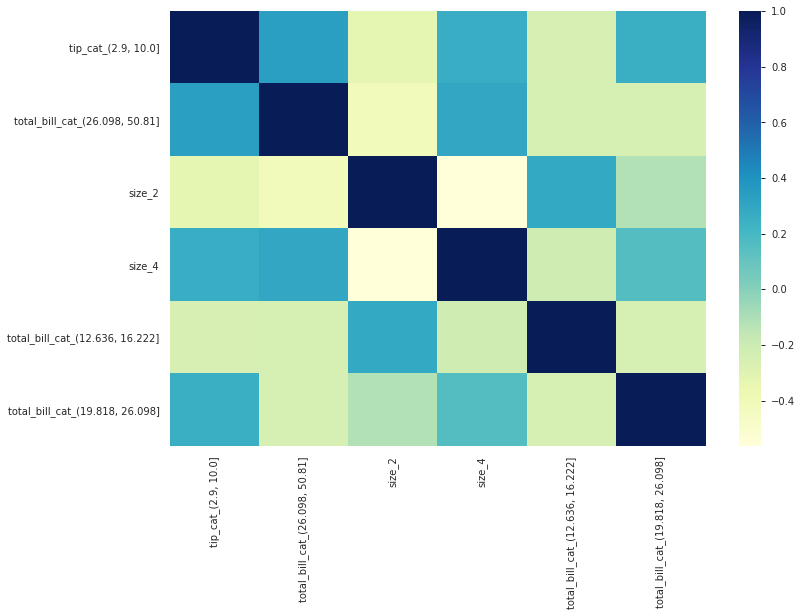

In [18]:
df = tips_final_r.corr()
new_index = df['tip_cat_(2.9, 10.0]'].sort_values(ascending=False, key=abs).index
df = df.reindex(new_index)
df = df.reindex(new_index, axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df, cmap="YlGnBu")
plt.show()

Del grafico anterior concluimos (en orden del valor absoluto de la correlación, es decir en orden de importancia):

- Si el total pagado por la cena está en el rango entre 26.1 y 50.8 es probable tener una propina alta.

- Si la mesa es ocupada por 2 personas es improbable tener una propina alta.

- Si la mesa es ocupada por 4 personas es probable tener una propina alta.

- Si el total pagado por la cena está en el rango entre 12.6 y 16.2 es improbable tener una propina alta.

- SI el total pagado por la cena está en el rango entre 19.8 y 26.1 es probable tener una propina alta.

### 2) Cargamos el dataset

In [19]:
data = pd.read_csv("../data/diabetes.csv", sep = "," )

print(f"Cantidad de registros: {data.shape[0]}")
print(f"Cantidad de variables: {data.shape[1]}")

Cantidad de registros: 768
Cantidad de variables: 9


Hacemos una primera inspección de los datos eligiendo 5 registros al azar

In [20]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
302,5,77,82,41,42,35.8,0.156,35,0
718,1,108,60,46,178,35.5,0.415,24,0
395,2,127,58,24,275,27.7,1.600,25,0
747,1,81,74,41,57,46.3,1.096,32,0
453,2,119,0,0,0,19.6,0.832,72,0


Revisamos el estado de los datos

In [21]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pregnancies,0,0.0,111,0.144531,17,int64
1,Glucose,0,0.0,5,0.006510,136,int64
2,BloodPressure,0,0.0,35,0.045573,47,int64
3,SkinThickness,0,0.0,227,0.295573,51,int64
4,Insulin,0,0.0,374,0.486979,186,int64
5,BMI,0,0.0,11,0.014323,248,float64
6,DiabetesPedigreeFunction,0,0.0,0,0.000000,517,float64
7,Age,0,0.0,0,0.000000,52,int64
8,Outcome,0,0.0,500,0.651042,2,int64


Vemos que aunque no hay variables con valores declarados como nulos, toman datos que son imposibles:

Glucosa = 0

Presión sanguínea = 0

Grosor de la piel = 0

Insulina = 0

Body Mass Index = 0

Además, la variable "Outcome" toma valores enteros, pero se refieren a categorías, hay que transformarla.

In [22]:
data["Outcome"] = data["Outcome"].astype(str)
data["Outcome"] = data["Outcome"].replace('0', 'no').replace('1', 'yes') 

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pregnancies,0,0.0,111,0.144531,17,int64
1,Glucose,0,0.0,5,0.006510,136,int64
2,BloodPressure,0,0.0,35,0.045573,47,int64
3,SkinThickness,0,0.0,227,0.295573,51,int64
4,Insulin,0,0.0,374,0.486979,186,int64
5,BMI,0,0.0,11,0.014323,248,float64
6,DiabetesPedigreeFunction,0,0.0,0,0.000000,517,float64
7,Age,0,0.0,0,0.000000,52,int64
8,Outcome,0,0.0,0,0.000000,2,object


Imputamos los valores imposibles por la mediana

In [23]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())

Inspeccionamos el estado de los datos

In [24]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pregnancies,0,0.0,111,0.144531,17,int64
1,Glucose,0,0.0,0,0.000000,135,int64
2,BloodPressure,0,0.0,0,0.000000,46,int64
3,SkinThickness,0,0.0,0,0.000000,50,int64
4,Insulin,0,0.0,0,0.000000,186,float64
5,BMI,0,0.0,0,0.000000,247,float64
6,DiabetesPedigreeFunction,0,0.0,0,0.000000,517,float64
7,Age,0,0.0,0,0.000000,52,int64
8,Outcome,0,0.0,0,0.000000,2,object


Vemos que los datos están ahora corregidos.

Determinamos ahora las variables que más se correlacionan con la variable a predecir "Outcome". Para eso pasamos todas las variables primero a categóricas, discretizando las variables numéricas. En primer lugar inspeccionamos las variables numéricas para decidir como haremos la discretización.

- Embarazos

In [25]:
data['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [26]:
profiling_num(data['Pregnancies'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Pregnancies,3.845052,3.369578,0.876341,0.0,0.0,1.0,3.0,6.0,10.0,13.0


La variable "Pregnancies" toma valores entre 1 y 17, siendo 4 el valor medio, y valores mayores a 10 pueden ser considerados como outliers. Dividimos esta variable en 3 categorías

In [27]:
data['Pregnancies_cat'], bins = pd.qcut(data['Pregnancies'], q=3, retbins=True)

- Glucosa

In [28]:
data['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [29]:
profiling_num(data['Glucose'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Glucose,121.65625,30.438286,0.250199,67.67,80.0,99.75,117.0,140.25,181.0,196.0


La variable "Glucose" toma valores entre 44 y 199, siendo 121 el valor medio, y valores mayores a 181 pueden ser considerados como outliers. Dividimos esta variable en 5 categorías

In [30]:
data['Glucose_cat'], bins = pd.qcut(data['Glucose'], q=5, retbins=True)

- Presion sanguínea

In [31]:
data['BloodPressure'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [32]:
profiling_num(data['BloodPressure'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,BloodPressure,72.386719,12.096642,0.167111,44.0,52.0,64.0,72.0,80.0,90.0,106.0


La variable "BloodPressure" toma valores entre 24 y 122, siendo 72 el valor medio, y valores mayores a 90 pueden ser considerados como outliers. Dividimos esta variable en 5 categorías

In [33]:
data['BloodPressure_cat'], bins = pd.qcut(data['BloodPressure'], q=5, retbins=True)

- Grosor de la piel

In [34]:
data['SkinThickness'].describe()

count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [35]:
profiling_num(data['SkinThickness'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,SkinThickness,27.334635,9.229014,0.337631,10.0,14.35,23.0,23.0,32.0,44.0,51.33


La variable "SkinThickness" toma valores entre 7 y 99, siendo 27 el valor medio, y valores mayores a 44 pueden ser considerados como outliers. Dividimos esta variable en 3 categorías (no tomamos 4 ni 5 porque el cuantil 0.25 coincide con el cuantil 0.5)

In [36]:
data['SkinThickness_cat'], bins = pd.qcut(data['SkinThickness'], q=3, retbins=True)

- Insulina

In [37]:
data['Insulin'].describe()

count    768.000000
mean      94.652344
std      105.547598
min       14.000000
25%       30.500000
50%       31.250000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [38]:
profiling_num(data['Insulin'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Insulin,94.652344,105.547598,1.115108,24.34,30.5,30.5,31.25,127.25,293.0,519.9


La variable "Insulin" toma valores entre 14 y 846, siendo 95 el valor medio, y valores mayores a 293 pueden ser considerados como outliers. Dividimos esta variable en 3 categorías (no tomamos 4 o 5 porque el cuantil 0.05 coincide con el cuantil 0.25 y está muy cercano al cuantil 0.5)

In [39]:
data['Insulin_cat'], bins = pd.qcut(data['Insulin'], q=3, retbins=True)

- BMI

In [40]:
data['BMI'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [41]:
profiling_num(data['BMI'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,BMI,32.450911,6.875366,0.21187,19.5,22.235,27.5,32.0,36.6,44.395,50.759


La variable "BMI" toma valores entre 18 y 67, siendo 32 el valor medio, y valores mayores a 44 pueden ser considerados como outliers. Dividimos esta variable en 5 categorías.

In [42]:
data['BMI_cat'], bins = pd.qcut(data['BMI'], q=5, retbins=True)

- DiabetesPedigreeFunction

In [43]:
data['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [44]:
profiling_num(data['DiabetesPedigreeFunction'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,DiabetesPedigreeFunction,0.471876,0.331329,0.702151,0.09468,0.14035,0.24375,0.3725,0.62625,1.13285,1.69833


La variable "DiabetesPedigreeFunction" toma valores entre 0.08 y 2.42, siendo 0.47 el valor medio, y valores mayores a 1.13 pueden ser considerados como outliers. Dividimos esta variable en 5 categorías.

In [45]:
data['DiabetesPedigreeFunction_cat'], bins = pd.qcut(data['DiabetesPedigreeFunction'], q=5, retbins=True)

- Age

In [46]:
data['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [47]:
profiling_num(data['Age'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,33.240885,11.760232,0.353788,21.0,21.0,24.0,29.0,41.0,58.0,67.0


La variable "Age" toma valores entre 21 y 81, siendo 33.2 el valor medio, y valores mayores a 58 pueden ser considerados como outliers. Dividimos esta variable en 4 categorías (pues el cuantil 0.01 coincide con el 0.05 y está muy próximo al 0.25)

In [48]:
data['Age_cat'], bins = pd.qcut(data['Age'], q=4, retbins=True)

Inspeccionamos elnuevo estado de los datos

In [49]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pregnancies,0,0.0,111,0.144531,17,int64
1,Glucose,0,0.0,0,0.000000,135,int64
2,BloodPressure,0,0.0,0,0.000000,46,int64
3,SkinThickness,0,0.0,0,0.000000,50,int64
4,Insulin,0,0.0,0,0.000000,186,float64
5,BMI,0,0.0,0,0.000000,247,float64
6,DiabetesPedigreeFunction,0,0.0,0,0.000000,517,float64
7,Age,0,0.0,0,0.000000,52,int64
8,Outcome,0,0.0,0,0.000000,2,object
9,Pregnancies_cat,0,0.0,0,0.000000,3,category


Nos quedamos solo con las variables categóricas

In [50]:
data_cat = data[cat_vars(data)]

Hacemos la conversión a variables numéricas con one-hot encoding

In [51]:
data_cat_sin_red = pd.get_dummies(data_cat, dummy_na=True, drop_first=True)

vars_to_drop = status(data_cat_sin_red).query("unique==1")['variable']

data_cat_final = data_cat_sin_red.drop(vars_to_drop, axis=1)

Inspeccionamos el dataset con las variables transformadas

In [52]:
data_cat_final.sample(5)

,Outcome_yes,"Pregnancies_cat_(2.0, 5.0]","Pregnancies_cat_(5.0, 17.0]","Glucose_cat_(95.0, 109.0]","Glucose_cat_(109.0, 125.0]","Glucose_cat_(125.0, 147.0]","Glucose_cat_(147.0, 199.0]","BloodPressure_cat_(62.0, 70.0]","BloodPressure_cat_(70.0, 74.0]","BloodPressure_cat_(74.0, 82.0]",...,"BMI_cat_(30.4, 33.7]","BMI_cat_(33.7, 37.8]","BMI_cat_(37.8, 67.1]","DiabetesPedigreeFunction_cat_(0.219, 0.303]","DiabetesPedigreeFunction_cat_(0.303, 0.454]","DiabetesPedigreeFunction_cat_(0.454, 0.687]","DiabetesPedigreeFunction_cat_(0.687, 2.42]","Age_cat_(24.0, 29.0]","Age_cat_(29.0, 41.0]","Age_cat_(41.0, 81.0]"
264,1,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
494,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
61,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
303,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Calculamos la (anti-)correlación lineal (con la estadística r) de todas las variables con la variable "Outcome_yes".

In [53]:
data_cat_final.corr(method="pearson")["Outcome_yes"].sort_values(ascending=False, key=abs)

Outcome_yes                                    1.000000
Glucose_cat_(147.0, 199.0]                     0.404161
Insulin_cat_(30.5, 94.333]                    -0.239452
Pregnancies_cat_(5.0, 17.0]                    0.209219
Age_cat_(41.0, 81.0]                           0.189892
BMI_cat_(37.8, 67.1]                           0.171125
Glucose_cat_(95.0, 109.0]                     -0.161971
Age_cat_(29.0, 41.0]                           0.156915
DiabetesPedigreeFunction_cat_(0.687, 2.42]     0.154637
Insulin_cat_(94.333, 846.0]                    0.154533
SkinThickness_cat_(30.0, 99.0]                 0.147373
BloodPressure_cat_(82.0, 122.0]                0.121223
Glucose_cat_(125.0, 147.0]                     0.096752
BMI_cat_(33.7, 37.8]                           0.086242
BMI_cat_(30.4, 33.7]                           0.079403
Age_cat_(24.0, 29.0]                          -0.056861
BMI_cat_(26.2, 30.4]                          -0.048247
Glucose_cat_(109.0, 125.0]                    -0

Seleccionamos las 5 variables que más se (anti-)correlación con la variable a predecir.

In [54]:
data_cat_final.corr(method="pearson")["Outcome_yes"].sort_values(ascending=False, key=abs)[:6].index

Index(['Outcome_yes', 'Glucose_cat_(147.0, 199.0]',
       'Insulin_cat_(30.5, 94.333]', 'Pregnancies_cat_(5.0, 17.0]',
       'Age_cat_(41.0, 81.0]', 'BMI_cat_(37.8, 67.1]'],
      dtype='object')

In [55]:
variables = data_cat_final.corr(method="pearson")["Outcome_yes"].sort_values(ascending=False, key=abs)[:6].index
data_cat_final_r = data_cat_final[variables]

Graficamos la correlación entre estas variables y la variable a predecir

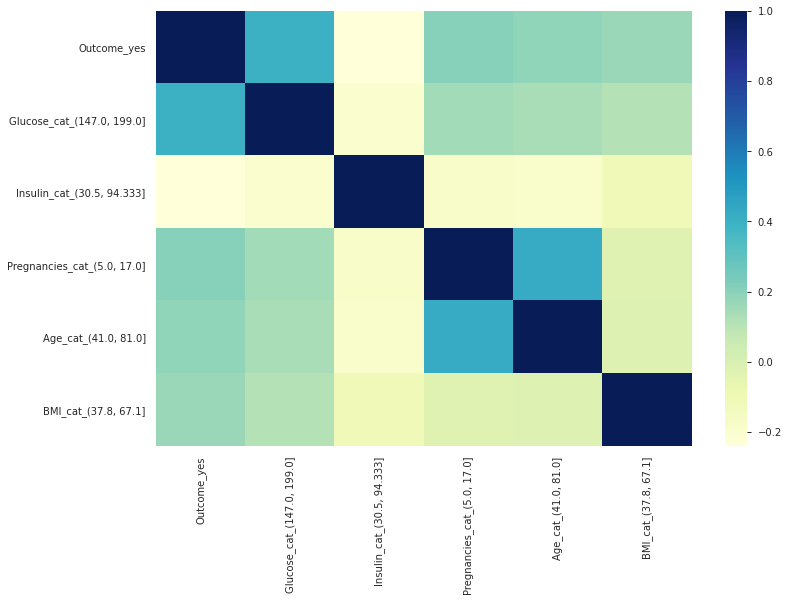

In [56]:
df = data_cat_final_r.corr()
new_index = df["Outcome_yes"].sort_values(ascending=False, key=abs).index
df = df.reindex(new_index)
df = df.reindex(new_index, axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df, cmap="YlGnBu")
plt.show()

La variable que más se correlaciona con tener diabetes es tener la glucosa alta (entre 147 y 199) como era de esperable. La variable que más se anticorrelaciona es tener la insulina en niveles medios (entre 30.5 y 94.33).